<a href="https://colab.research.google.com/github/LuccaRomagnolli/Neural-Networks/blob/Machine-Learning/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

## What´s Logistic Regression
Logistic Regression is a supervised machine learning algorithm used for classification problems. Unlike linear regression which predicts continuous values it predicts the probability that an input belongs to a specific class. It is used for binary classification where the output can be one of two possible categories such as Yes/No, True/False or 0/1. It uses sigmoid function to convert inputs into a probability value between 0 and 1

### Diference between Simple Linear regression and Logistic Linear Regression

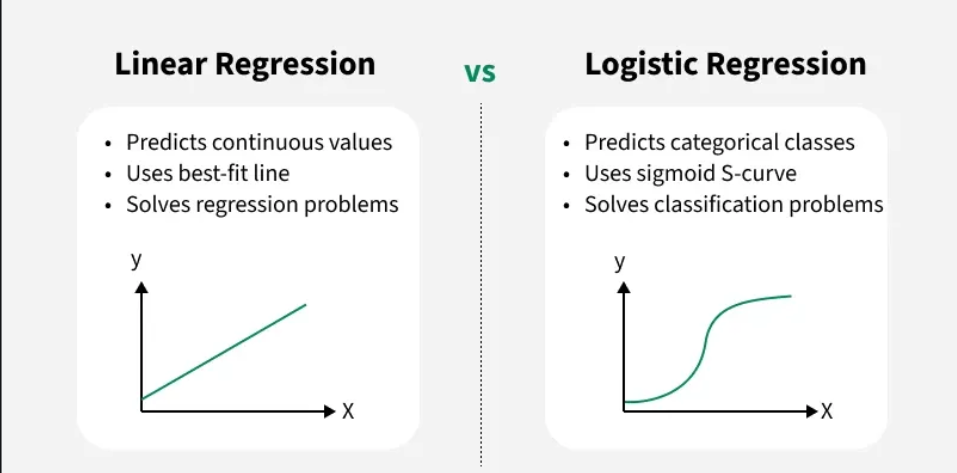

### - Types of Logistic Regression

#### Logistic regression can be classified into three main types based on the nature of the dependent variable:

  1. `Binomial Logistic Regression`: This type is used when the dependent variable has only two possible categories. Examples include Yes/No, Pass/Fail or 0/1. It is the most common form of logistic regression and is used for binary classification problems.

  2. `Multinomial Logistic Regression`: This is used when the dependent variable has three or more possible categories that are not ordered. For example, classifying animals into categories like "cat," "dog" or "sheep." It extends the binary logistic regression to handle multiple classes.

  3. `Ordinal Logistic Regression`: This type applies when the dependent variable has three or more categories with a natural order or ranking. Examples include ratings like "low," "medium" and "high." It takes the order of the categories into account when modeling.



### - Assumptions of Logistic Regression

#### Understanding the assumptions behind logistic regression is important to ensure the model is applied correctly, main assumptions are:

  1. `Independent observations`: Each data point is assumed to be independent of the others means there should be no correlation or dependence between the input samples.

  2. `Binary dependent variables`: It takes the assumption that the dependent variable must be binary, means it can take only two values. For more than two categories SoftMax functions are used.

  3. `Linearity relationship between independent variables and log odds`: The model assumes a linear relationship between the independent variables and the log odds of the dependent variable which means the predictors affect the log odds in a linear way.

  4. `No outliers`: The dataset should not contain extreme outliers as they can distort the estimation of the logistic regression coefficients.

  5. `Large sample size`: It requires a sufficiently large sample size to produce reliable and stable results.

## About data


About Dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:


Diagnosis (M = malignant, B = benign)


Ten real-valued features are computed for each cell nucleus:

1. `radius` (mean of distances from center to points on the perimeter)
2. `texture` (standard deviation of gray-scale values)
3. `perimeter`
4. `area`
5. `smoothness` (local variation in radius lengths)
6. `compactness` (perimeter^2 / area - 1.0)
7. `concavity` (severity of concave portions of the contour)
8. `concave points` (number of concave portions of the contour)
9. `fractal dimension` ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## 1 - Scraping Data

In [7]:
import pandas as pd
import numpy as np
import requests, zipfile, io

In [5]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
stream =  requests.get(url).content


header = [
    'id', 'diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concavepoints_mean', 'symmetry_mean', 'fractaldimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
    'compactness_se', 'concavity_se', 'concavepoints_se', 'symmetry_se', 'fractaldimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
    'compactness_worst', 'concavity_worst', 'concavepoints_worst', 'symmetry_worst', 'fractaldimension_worst'
]

data_pd = pd.read_csv(io.StringIO(stream.decode('utf-8')),header=0, names=header)
data_pd.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractaldimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


## 2 - Prepare data

In [9]:
from sklearn.model_selection import train_test_split

X = data_pd.drop(['id','diagnosis'],axis=1)
y = data_pd['diagnosis']
# Split in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4 )

### Scale Preprossesing
* The scale preprocessing method centers the data to the mean and scale to the variance
* We don`t have the variance in the statistics provided by describe but we have the standat deviation that is the square root of the variance

In [11]:
# Rescale the data

from sklearn import preprocessing
X_scaled_train = preprocessing.scale(X_train)
X_scaled_test = preprocessing.scale(X_test)

In [12]:
# Visualise the difference between original dataset and scaling data set
rain_pd = pd.DataFrame(data=X_train, columns=header[2::])
scaled_train_pd = pd.DataFrame(data=X_scaled_train, columns=header[2::])
display(X_train.describe())
display(scaled_train_pd.describe())

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractaldimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractaldimension_worst
count,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,...,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000,454.000000
mean,14.148075,19.187225,92.091938,657.297357,0.096070,0.103317,0.088943,0.048866,0.180923,0.062620,...,16.291214,25.491101,107.400000,884.320925,0.131625,0.250882,0.270643,0.114470,0.289596,0.083372
std,3.542059,4.179659,24.438048,354.711664,0.014182,0.052678,0.081726,0.039369,0.028134,0.006828,...,4.856700,6.001749,33.683737,574.281250,0.021948,0.149734,0.208287,0.065912,0.062294,0.016808
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.050240,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.710000,16.172500,75.192500,421.475000,0.085902,0.063745,0.028615,0.019672,0.161800,0.057633,...,12.987500,21.065000,83.862500,513.925000,0.116300,0.147925,0.116475,0.063370,0.250425,0.071270
50%,13.335000,18.750000,86.140000,548.750000,0.095115,0.092000,0.059105,0.033300,0.178600,0.061455,...,14.910000,25.370000,97.585000,683.950000,0.131200,0.211650,0.221800,0.101100,0.280950,0.079960
75%,15.977500,21.715000,104.250000,792.025000,0.104875,0.130275,0.128775,0.074122,0.196550,0.066110,...,18.937500,29.390000,125.775000,1100.250000,0.145175,0.334150,0.380575,0.161375,0.319525,0.091865
max,28.110000,33.560000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.209800,0.868100,1.252000,0.291000,0.663800,0.173000


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concavepoints_mean,symmetry_mean,fractaldimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concavepoints_worst,symmetry_worst,fractaldimension_worst
count,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,...,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,4.540000e+02,454.000000,4.540000e+02,4.540000e+02,4.540000e+02
mean,1.095550e-16,1.799833e-16,4.069187e-16,-9.390433e-17,6.495049e-16,1.897650e-16,-1.330311e-16,-3.912680e-18,-3.795300e-16,3.795300e-16,...,3.912680e-17,2.504115e-16,-5.947274e-16,1.721579e-16,2.582369e-16,7.825361e-18,0.000000,1.878087e-16,6.142908e-16,1.349875e-16
std,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,...,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103e+00,1.001103,1.001103e+00,1.001103e+00,1.001103e+00
min,-2.025653e+00,-2.269965e+00,-1.978686e+00,-1.450091e+00,-2.368996e+00,-1.595156e+00,-1.089505e+00,-1.242608e+00,-2.665966e+00,-1.815143e+00,...,-1.723483e+00,-2.247005e+00,-1.693781e+00,-1.218727e+00,-2.297773e+00,-1.447909e+00,-1.300808,-1.738624e+00,-2.138944e+00,-1.687518e+00
25%,-6.890807e-01,-7.220805e-01,-6.922844e-01,-6.655617e-01,-7.177096e-01,-7.520343e-01,-7.389842e-01,-7.423606e-01,-6.804406e-01,-7.312642e-01,...,-6.809888e-01,-7.382821e-01,-6.995502e-01,-6.456845e-01,-6.990346e-01,-6.883578e-01,-0.740987,-7.761349e-01,-6.295077e-01,-7.208310e-01
50%,-2.298019e-01,-1.047231e-01,-2.438208e-01,-3.063533e-01,-6.739521e-02,-2.150703e-01,-3.654957e-01,-3.958300e-01,-8.264795e-02,-1.708141e-01,...,-2.847072e-01,-2.019993e-02,-2.917084e-01,-3.492922e-01,-1.939963e-02,-2.622993e-01,-0.234756,-2.030764e-01,-1.389510e-01,-2.032394e-01
75%,5.170561e-01,6.054474e-01,4.980542e-01,3.802420e-01,6.215674e-01,5.123159e-01,4.879298e-01,6.422363e-01,5.560651e-01,5.116961e-01,...,5.454745e-01,6.503437e-01,5.461173e-01,3.764136e-01,6.180432e-01,5.567224e-01,0.528374,7.124047e-01,4.809745e-01,5.058432e-01
max,3.946103e+00,3.442537e+00,3.949350e+00,5.203484e+00,4.752873e+00,4.600597e+00,4.138599e+00,3.873662e+00,4.379448e+00,5.105261e+00,...,4.070783e+00,4.011402e+00,4.273832e+00,5.874119e+00,3.565789e+00,4.126654e+00,4.716760,2.681202e+00,6.013699e+00,5.338386e+00


## 3 - Create a model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [14]:
clf = LogisticRegression(solver='lbfgs').fit(X_scaled_train, y_train)

In [15]:
# Look at some of the model attributes

print('Result classes      : {0}'.format(clf.classes_))
print('Numer of interations:{0}'.format(clf.n_iter_[0]))
print('Intercept           : {}'.format(clf.intercept_[0]))

Result classes      : ['B' 'M']
Numer of interations:19
Intercept           : -0.24144480472674812


### Look at a few predictions

In [31]:
predict = clf.predict(X_scaled_test[5:8])
predict_proba = clf.predict_proba(X_scaled_test[5:8])

for i in range(3):
  print(f"Prediction = {predict[i]}, Probability = [{predict_proba[i][0]:.8f}%, {predict_proba[i][1]:.8f}%]")

Prediction = B, Probability = [0.99991195%, 0.00008805%]
Prediction = M, Probability = [0.00000889%, 0.99999111%]
Prediction = B, Probability = [0.99999924%, 0.00000076%]


### How accurate is our model?
The model strike the correct label in 98% of the times

In [34]:
score = clf.score(X_scaled_test,y_test)
print(f'Mean accuracy clf: {score}')

Mean accuracy clf: 0.9824561403508771


## Parameter importance

This section of the code explores the importance of each feature (attribute) in the trained logistic regression model. Logistic regression, at its core, uses a linear combination of the input features, and each feature is assigned a weight (or coefficient) during the training process. These weights indicate the impact of each feature on the prediction.

The code retrieves these learned weights and then analyzes them to understand which features the model considers most influential in determining the `diagnosis`.

In [37]:
x = zip(X_test.columns.tolist(), clf.coef_[0].tolist()) # Access the first (and only) list of coefficients

importance =  pd.DataFrame( data=list(x), columns= ['NAME', 'WEIGHT'])
print(f'Number of records: {importance.shape}')

# Now, apply abs() to the scalar value within each 'WEIGHT' entry
importance.reindex(importance.WEIGHT.abs().sort_values(ascending=False).index)

Number of records: (30, 2)


,NAME,WEIGHT
21,texture_worst,1.222068
10,radius_se,1.205867
26,concavity_worst,1.038209
7,concavepoints_mean,1.010943
20,radius_worst,0.920272
28,symmetry_worst,0.876170
23,area_worst,0.873189
13,area_se,0.851351
6,concavity_mean,0.837029
27,concavepoints_worst,0.798885
